In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [2]:
os.getcwd()

'C:\\code\\Uni\\ba\\notebooks'

In [19]:
# Opening JSON file 
f = open('metrics/rf_storage.json') 
g = open('metrics/lr_storage.json')  
# returns JSON object as  
# a dictionary 
rf_data = json.load(f)
lr_data = json.load(g)
f.close()
g.close()

In [40]:
rf_df = pd.DataFrame.from_dict(rf_data)

In [44]:
l = []
for i in range(5):
    for _ in range(5):
        l.append(i)
rf_df.insert(0, "Fold", l)

In [45]:
rf_df.head()

,Fold,acc,b_acc,sensitivity,ppv,fpr,tpr,auc
0,0,0.767857,0.737154,0.909091,0.750000,"[0.0, 0.0, 0.0, 0.043478260869565216, 0.043478...","[0.0, 0.030303030303030304, 0.1818181818181818...",0.810277
1,0,0.714286,0.685112,0.848485,0.717949,"[0.0, 0.0, 0.0, 0.043478260869565216, 0.043478...","[0.0, 0.030303030303030304, 0.2121212121212121...",0.805665
2,0,0.732143,0.693676,0.909091,0.714286,"[0.0, 0.0, 0.0, 0.0, 0.08695652173913043, 0.08...","[0.0, 0.030303030303030304, 0.0909090909090909...",0.800395
3,0,0.732143,0.700264,0.878788,0.725000,"[0.0, 0.0, 0.08695652173913043, 0.086956521739...","[0.0, 0.030303030303030304, 0.0303030303030303...",0.739130
4,0,0.714286,0.691700,0.818182,0.729730,"[0.0, 0.0, 0.043478260869565216, 0.04347826086...","[0.0, 0.030303030303030304, 0.0303030303030303...",0.760211


Text(0.5, 1.0, 'Logistic Regression')

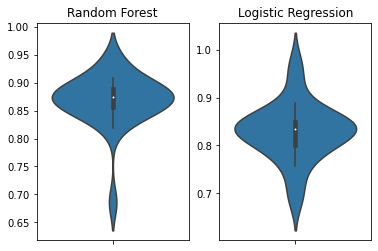

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.violinplot(y=rf_data['sensitivity'], ax=axes[0])
axes[0].set_title("Random Forest")
sns.violinplot(y=lr_data['sensitivity'], ax=axes[1])
axes[1].set_title("Logistic Regression")

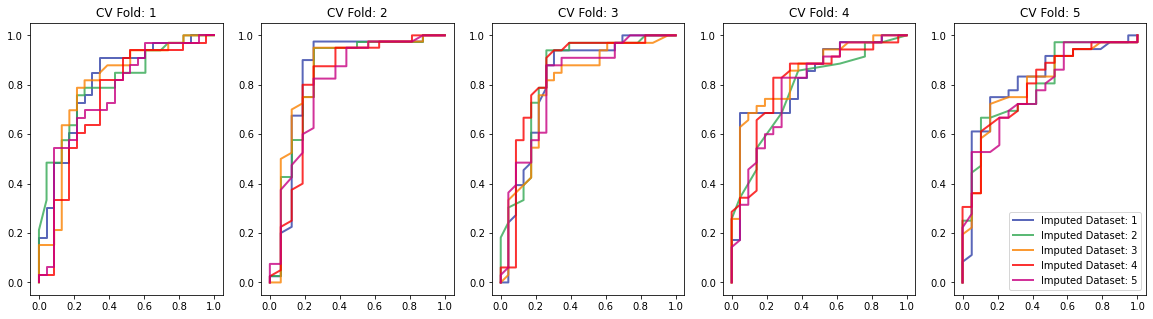

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
col_dict = {0:'#3141a8', 1:'#32a852', 2:'#fa8100', 3:'#fa0000', 4:'#c70081'}
for i in range(rf_df.shape[0]):
    ax[i//5].plot(rf_df.iloc[i].fpr, rf_df.iloc[i].tpr, color=col_dict[i%5],
        lw=2, alpha=.8, label=r'Imputed Dataset: %d' % (i%5+1))
for i in range(5):
    ax[i].set_title(r"CV Fold: %d" % (i+1))
plt.legend()
plt.show()
# additional ideas
# mean ROC for every fold and mean AUC for every fold including std

In [67]:
for i in range(25):
    print(i % 5)

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
